## 1. Epsilon-Greedy Implementation

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def epsilon_greedy(num_arms, true_rewards, num_steps, epsilon):

    # Initialize estimated rewards and counts for each arm
    estimated_rewards = np.zeros(num_arms)
    arm_counts = np.zeros(num_arms)

    total_reward = 0
    rewards_per_step = []

    for step in range(num_steps):
        # Exploration vs Exploitation
        if np.random.rand() < epsilon:
            # Explore: Choose a random arm
            chosen_arm = np.random.randint(num_arms)
        else:
            # Exploit: Choose the arm with the highest estimated reward
            chosen_arm = np.argmax(estimated_rewards)

        # Simulate pulling the chosen arm
        reward = np.random.normal(true_rewards[chosen_arm], 1.0)  # Add Gaussian noise to the reward

        # Update total reward and rewards per step
        total_reward += reward
        rewards_per_step.append(reward)

        # Update arm counts and estimated rewards
        arm_counts[chosen_arm] += 1
        estimated_rewards[chosen_arm] += (reward - estimated_rewards[chosen_arm]) / arm_counts[chosen_arm]

    return total_reward, rewards_per_step, arm_counts

# Experiment with different epsilon values
def run_experiments():
    num_arms = 5
    true_rewards = [1.0, 1.5, 2.0, 0.5, 1.2]  # True mean rewards for each arm
    num_steps = 1000

    epsilons = [0.1, 0.2, 0.5]
    results = {}

    for epsilon in epsilons:
        total_reward, rewards_per_step, arm_counts = epsilon_greedy(num_arms, true_rewards, num_steps, epsilon)
        results[epsilon] = {
            "total_reward": total_reward,
            "rewards_per_step": rewards_per_step,
            "arm_counts": arm_counts
        }

        print(f"Epsilon: {epsilon}")
        print(f"Total Reward: {total_reward}")
        print(f"Arm Selection Counts: {arm_counts}")
        print("-" * 30)

    # Visualization
    plt.figure(figsize=(12, 6))
    for epsilon, result in results.items():
        plt.plot(np.cumsum(result["rewards_per_step"]), label=f"Epsilon: {epsilon}")

    plt.title("Cumulative Reward for Different Epsilon Values")
    plt.xlabel("Steps")
    plt.ylabel("Cumulative Reward")
    plt.legend()
    plt.show()

Epsilon: 0.1
Total Reward: 1912.7590941132469
Arm Selection Counts: [ 40.  18. 908.  13.  21.]
------------------------------
Epsilon: 0.2
Total Reward: 1722.0042014109506
Arm Selection Counts: [ 40. 306. 565.  39.  50.]
------------------------------
Epsilon: 0.5
Total Reward: 1620.7487556124324
Arm Selection Counts: [116. 117. 583.  86.  98.]
------------------------------


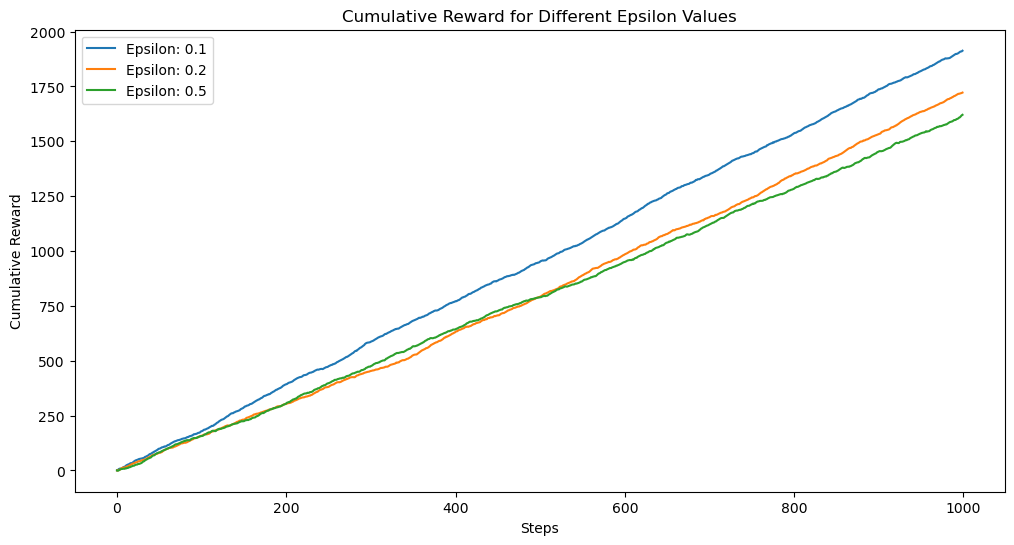

In [4]:
# Run the experiments
run_experiments()

## 2. UCB (Upper Confidence Bound) Algorithm

In [47]:
# UCB Algorithm
def ucb_bandit(num_arms, true_rewards, num_steps, c=2):
    arm_selection_counts = np.zeros(num_arms) 
    arm_total_rewards = np.zeros(num_arms)  
    rewards_over_time = []
    
    # Initializing by pulling each arm once
    for arm in range(num_arms):
        reward = np.random.normal(true_rewards[arm], 1)  # Assuming Gaussian rewards
        arm_total_rewards[arm] += reward
        arm_selection_counts[arm] += 1
    
    total_reward = sum(arm_total_rewards)
    
    for t in range(num_arms, num_steps):
        # Calculate UCB values for each arm
        ucb_values = arm_total_rewards / arm_selection_counts + c * np.sqrt(np.log(t) / arm_selection_counts)
        
        # Select arm with highest UCB value
        chosen_arm = np.argmax(ucb_values)
        reward = np.random.normal(true_rewards[chosen_arm], 1)
        
        # Update counts and rewards
        arm_selection_counts[chosen_arm] += 1
        arm_total_rewards[chosen_arm] += reward
        total_reward += reward
        rewards_over_time.append(total_reward)
    
    return total_reward, arm_selection_counts, rewards_over_time

# Example usage
num_arms = 5
true_rewards = [1.0, 1.5, 2.0, 0.5, 1.2]  # True mean rewards of the arms
num_steps = 1000

In [51]:
# Experiment with different exploration parameters
for c in [1, 2, 5]:
    total_reward, arm_counts, rewards_over_time = ucb_bandit(num_arms, true_rewards, num_steps, c)
    print(f"Exploration Parameter (c): {c}")
    print(f"Total Reward: {total_reward}")
    print(f"Arm Selection Counts: {arm_counts}")
    print("------------------------------")

Exploration Parameter (c): 1
Total Reward: 1956.5032830237615
Arm Selection Counts: [  8.  13. 963.   1.  15.]
------------------------------
Exploration Parameter (c): 2
Total Reward: 1850.499014817249
Arm Selection Counts: [ 31.  95. 819.  17.  38.]
------------------------------
Exploration Parameter (c): 5
Total Reward: 1679.8546532484727
Arm Selection Counts: [ 65. 171. 624.  49.  91.]
------------------------------


## 3. Thompson Sampling for Bernoulli Bandits

In [22]:
import numpy as np

def thompson_sampling(num_arms, true_probs, num_steps):

    arm_selection_counts = np.zeros(num_arms)  # Count of selections for each arm
    successes = np.zeros(num_arms)  # Count of successes for each arm
    failures = np.zeros(num_arms)  # Count of failures for each arm
    total_reward = 0
    
    for _ in range(num_steps):
        # Sample from Beta distribution for each arm
        beta_samples = [np.random.beta(successes[i] + 1, failures[i] + 1) for i in range(num_arms)]
        
        # Select the arm with the highest sampled value
        chosen_arm = np.argmax(beta_samples)
        
        # Simulate reward from Bernoulli distribution
        reward = np.random.binomial(1, true_probs[chosen_arm])
        
        # Update success/failure counts
        if reward == 1:
            successes[chosen_arm] += 1
        else:
            failures[chosen_arm] += 1
        
        arm_selection_counts[chosen_arm] += 1
        total_reward += reward
    
    return total_reward, arm_selection_counts

In [24]:
# Experiment 
num_arms = 5
true_probs = [0.1, 0.3, 0.7, 0.5, 0.9]  # True success probabilities of the arms
num_steps = 1000

total_reward, arm_counts = thompson_sampling(num_arms, true_probs, num_steps)
print(f"Total Reward: {total_reward}")
print(f"Arm Selection Counts: {arm_counts}")

Total Reward: 872
Arm Selection Counts: [  6.  13.   9.   6. 966.]


## Comparison of Multi-Armed Bandit Algorithms

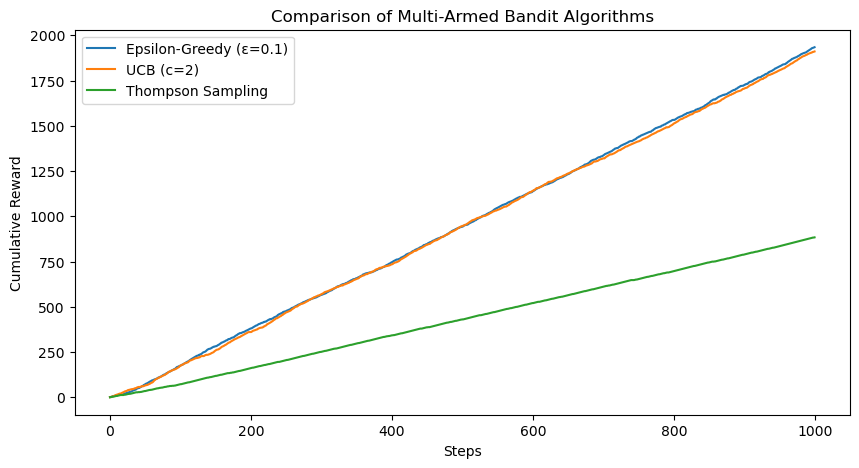

In [64]:
import numpy as np
import matplotlib.pyplot as plt

def epsilon_greedy(num_arms, true_rewards, num_steps, epsilon):
    estimated_rewards = np.zeros(num_arms)
    arm_counts = np.zeros(num_arms)
    rewards_per_step = []
    
    for step in range(num_steps):
        if np.random.rand() < epsilon:
            chosen_arm = np.random.randint(num_arms)
        else:
            chosen_arm = np.argmax(estimated_rewards)
        
        reward = np.random.normal(true_rewards[chosen_arm], 1.0)
        arm_counts[chosen_arm] += 1
        estimated_rewards[chosen_arm] += (reward - estimated_rewards[chosen_arm]) / arm_counts[chosen_arm]
        rewards_per_step.append(reward)
    
    return np.cumsum(rewards_per_step)

def ucb_bandit(num_arms, true_rewards, num_steps, c=2):
    arm_selection_counts = np.ones(num_arms)
    arm_total_rewards = np.array([np.random.normal(true_rewards[i], 1) for i in range(num_arms)])
    rewards_over_time = list(arm_total_rewards)
    
    for t in range(num_arms, num_steps):
        ucb_values = arm_total_rewards / arm_selection_counts + c * np.sqrt(np.log(t + 1) / arm_selection_counts)
        chosen_arm = np.argmax(ucb_values)
        reward = np.random.normal(true_rewards[chosen_arm], 1)
        
        arm_selection_counts[chosen_arm] += 1
        arm_total_rewards[chosen_arm] += reward
        rewards_over_time.append(reward)
    
    return np.cumsum(rewards_over_time)

def thompson_sampling(num_arms, true_probs, num_steps):
    successes = np.zeros(num_arms)
    failures = np.zeros(num_arms)
    rewards_over_time = []
    
    for _ in range(num_steps):
        beta_samples = [np.random.beta(successes[i] + 1, failures[i] + 1) for i in range(num_arms)]
        chosen_arm = np.argmax(beta_samples)
        reward = np.random.binomial(1, true_probs[chosen_arm])
        
        if reward == 1:
            successes[chosen_arm] += 1
        else:
            failures[chosen_arm] += 1
        
        rewards_over_time.append(reward)
    
    return np.cumsum(rewards_over_time)

# Experiment Setup
num_arms = 5
num_steps = 1000
true_rewards = [1.0, 1.5, 2.0, 0.5, 1.2]
true_probs = [0.1, 0.3, 0.7, 0.5, 0.9]

# Run Algorithms
epsilon_rewards = epsilon_greedy(num_arms, true_rewards, num_steps, epsilon=0.1)
ucb_rewards = ucb_bandit(num_arms, true_rewards, num_steps, c=2)
thompson_rewards = thompson_sampling(num_arms, true_probs, num_steps)

# Plot Comparison
plt.figure(figsize=(10, 5))
plt.plot(epsilon_rewards, label="Epsilon-Greedy (ε=0.1)")
plt.plot(ucb_rewards, label="UCB (c=2)")
plt.plot(thompson_rewards, label="Thompson Sampling")

plt.title("Comparison of Multi-Armed Bandit Algorithms")
plt.xlabel("Steps")
plt.ylabel("Cumulative Reward")
plt.legend()
plt.show()
